# Face Keypoint Detection

## Part 1. Deepface

In [84]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
%load_ext lab_black

In [14]:
def plot_cv2_img(img, figsize=(5, 5)):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis("off")
    plt.imshow(img)
    plt.show()

In [5]:
cap = cv2.VideoCapture(7)

Smile! *FLASH*


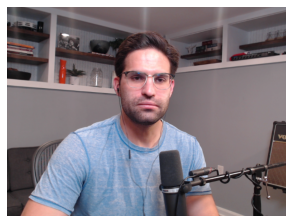

Smile! *FLASH*


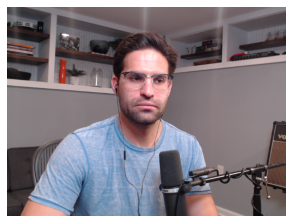

Smile! *FLASH*


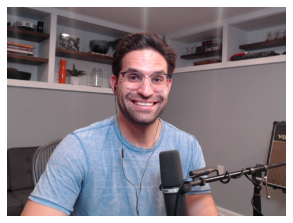

Smile! *FLASH*


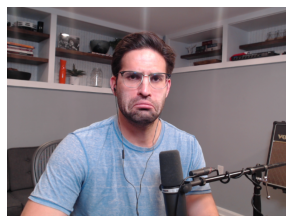

Smile! *FLASH*


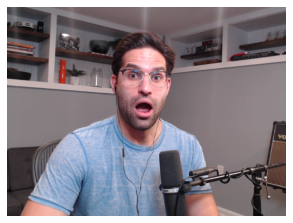

Smile! *FLASH*


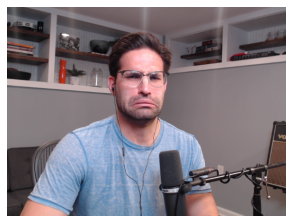

Smile! *FLASH*


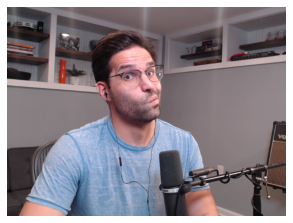

Smile! *FLASH*


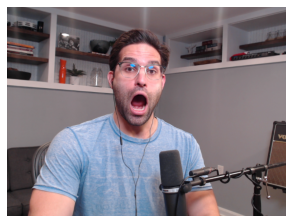

In [119]:
imgs = []
for x in range(8):
    time.sleep(3)
    for _ in range(10):
        res, img = cap.read()
    print("Smile! *FLASH*")
    res, img = cap.read()
    plot_cv2_img(img)
    imgs.append(img)

In [33]:
backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "mediapipe"]

In [42]:
# !wget https://www.biography.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTY3MDUxMjkzMjI1OTIwMTcz/brad-pitt-attends-the-premiere-of-20th-century-foxs--square.jpg

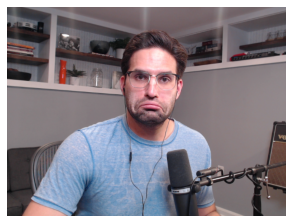

In [51]:
plot_cv2_img(imgs[2])

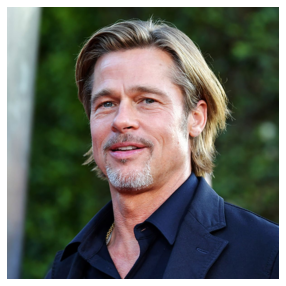

In [53]:
plot_cv2_img(
    cv2.imread("brad-pitt-attends-the-premiere-of-20th-century-foxs--square.jpg")
)

In [77]:
backends

['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

In [75]:
## face verification
obj = DeepFace.verify(
    img1_path=imgs[2],
    # img2_path=imgs[0],
    img2_path="brad-pitt-attends-the-premiere-of-20th-century-foxs--square.jpg",
    detector_backend=backends[4],
)
print(obj)

1/1 [==============================] - 0s 23ms/step
{'verified': True, 'distance': 0.345617406250456, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine'}


## Find Faces

In [79]:
# #face recognition
# df = DeepFace.find(img_path = "img.jpg",
#                    db_path = "my_db",
#                    detector_backend = backends[4])

# Facial Analysis

In [80]:
demographycial analysis
demography = DeepFace.analyze(img_path=imgs[0], detector_backend=backends[4])

Action: emotion:   0%|                                                                          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 128ms/step


Action: age:  25%|█████████████████▌                                                    | 1/4 [00:00<00:00,  3.41it/s]

1/1 [==============================] - 0s 228ms/step


Action: gender:  50%|█████████████████████████████████▌                                 | 2/4 [00:00<00:00,  2.72it/s]

1/1 [==============================] - 0s 255ms/step


Action: race:  75%|███████████████████████████████████████████████████▊                 | 3/4 [00:01<00:00,  2.98it/s]

1/1 [==============================] - 0s 214ms/step


Action: race: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.18it/s]


In [114]:
def plot_img_emotion(img, emo_df, figsize=(15, 5)):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].axis("off")
    axs[0].imshow(img)
    emo_df.sort_values("prediction").plot(kind="barh", figsize=figsize, ax=axs[1])
    plt.tight_layout()
    plt.show()

# Emotion Recognition

1/1 [==============================] - 0s 27ms/step


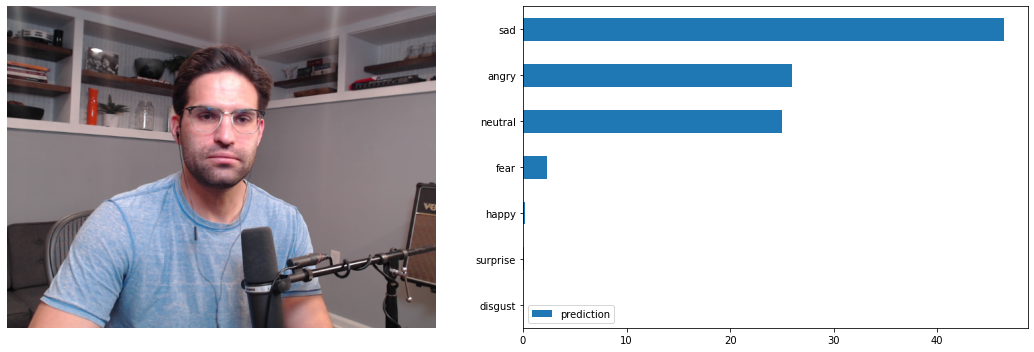

1/1 [==============================] - 0s 26ms/step


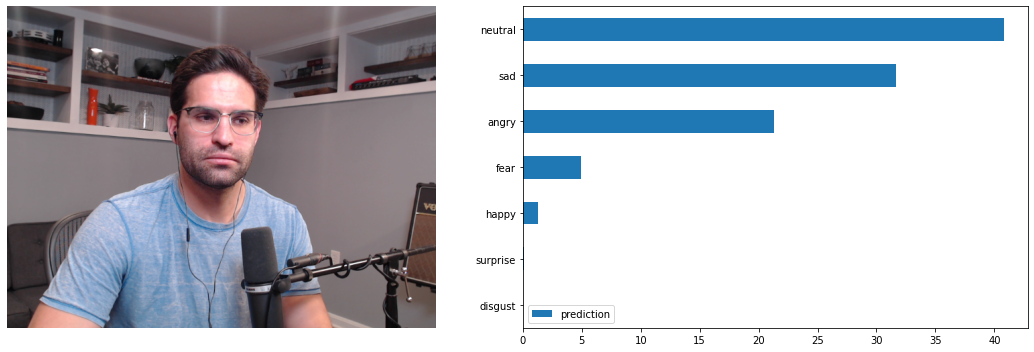

1/1 [==============================] - 0s 24ms/step


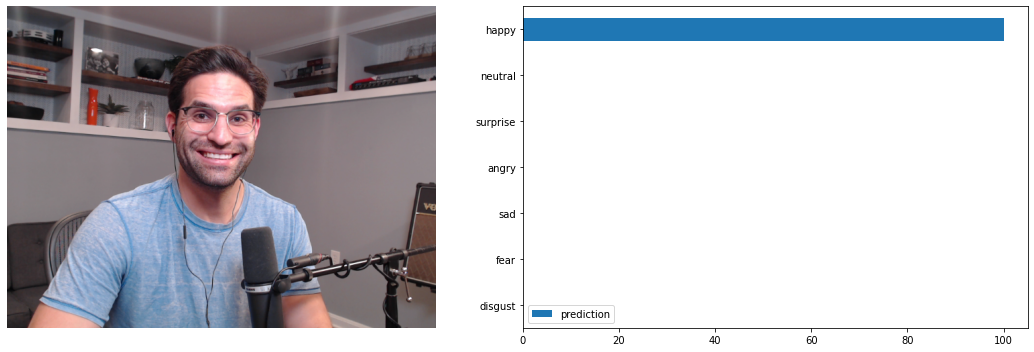

1/1 [==============================] - 0s 24ms/step


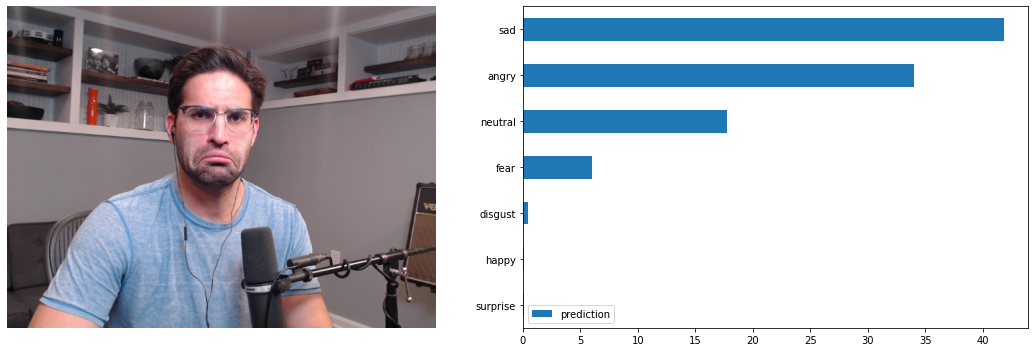

1/1 [==============================] - 0s 22ms/step


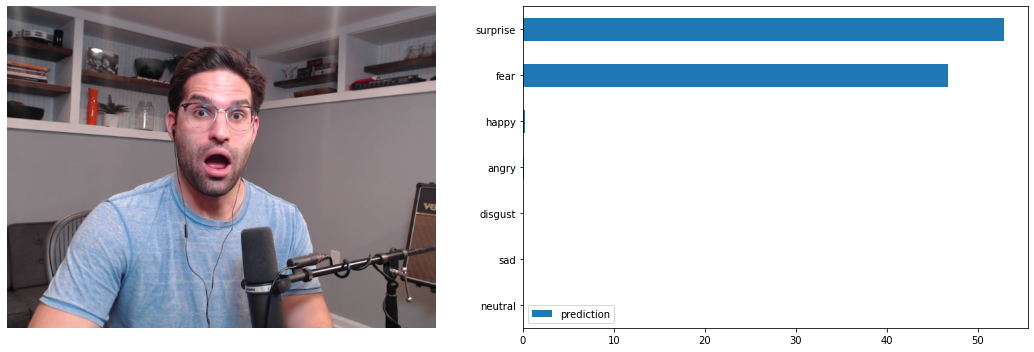

1/1 [==============================] - 0s 28ms/step


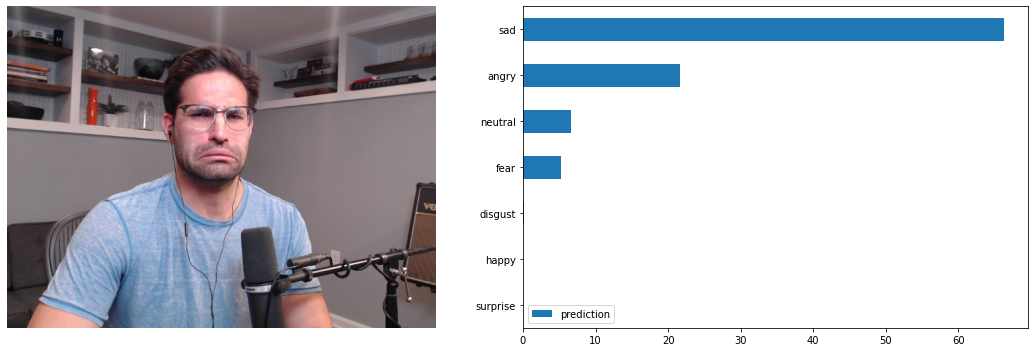

1/1 [==============================] - 0s 22ms/step


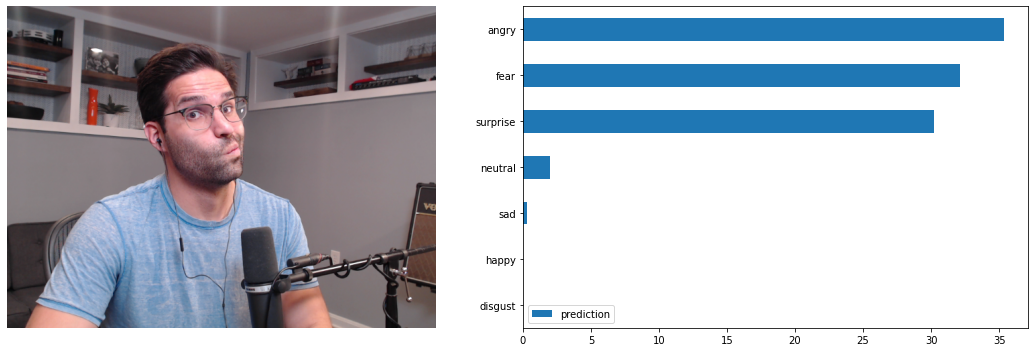

1/1 [==============================] - 0s 24ms/step


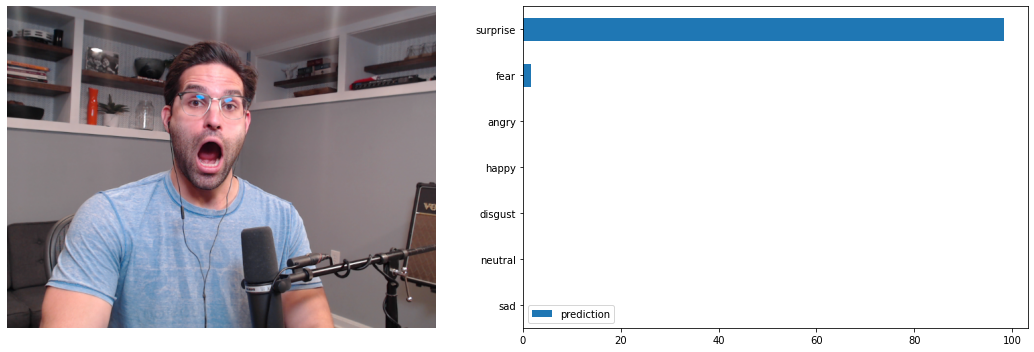

In [120]:
for img in imgs:
    demography = DeepFace.analyze(
        img_path=img, detector_backend=backends[4], prog_bar=False
    )
    emo_df = pd.DataFrame(demography["emotion"], index=[0]).T.rename(
        columns={0: "prediction"}
    )
    plot_img_emotion(img, emo_df)

# Age Prediction

In [125]:
demography.keys()

dict_keys(['emotion', 'dominant_emotion', 'region', 'age', 'gender', 'race', 'dominant_race'])

In [130]:
for be in backends:
    print(f"=============  BACKEND: {be} ==============")
    try:
        for img in imgs:
            try:
                demography = DeepFace.analyze(
                    img_path=img, detector_backend=be, prog_bar=False
                )
                print(
                    demography["age"], demography["dominant_race"], demography["gender"]
                )
            except ValueError:
                print("Broke")
    except:
        print("Broke")

=============  BACKEND: opencv ==============
1/1 [==============================] - 0s 34ms/step
33 white Man
1/1 [==============================] - 0s 30ms/step
29 white Man
1/1 [==============================] - 0s 31ms/step
34 white Man
1/1 [==============================] - 0s 28ms/step
32 white Man
1/1 [==============================] - 0s 34ms/step
32 white Man
1/1 [==============================] - 0s 28ms/step
31 white Man
Broke
1/1 [==============================] - 0s 28ms/step
32 white Man
=============  BACKEND: ssd ==============
1/1 [==============================] - 0s 27ms/step
33 white Man
1/1 [==============================] - 0s 26ms/step
33 white Man
1/1 [==============================] - 0s 27ms/step
33 white Man
1/1 [==============================] - 0s 27ms/step
39 white Man
1/1 [==============================] - 0s 25ms/step
33 white Man
1/1 [==============================] - 0s 33ms/step
39 white Man
1/1 [==============================] - 0s 27ms/step
36 white

# Dlib Keypoint Detection

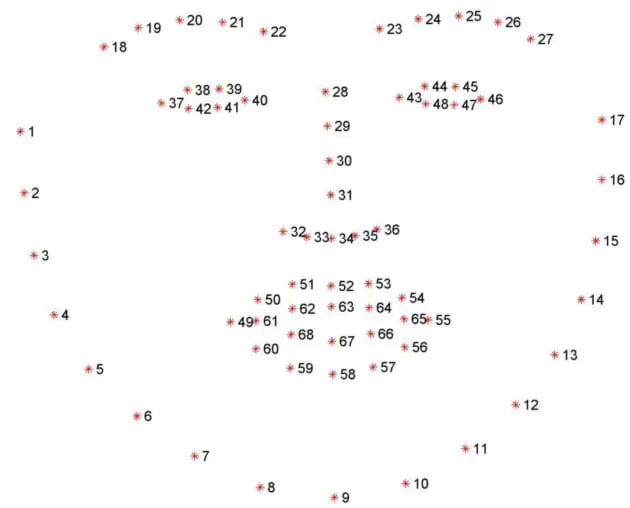

In [134]:
import dlib
from imutils import face_utils

In [133]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [154]:
len(shape)

68

In [161]:
len(shape)

68

Smile! *FLASH*


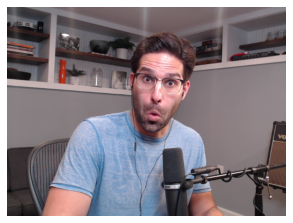

Smile! *FLASH*


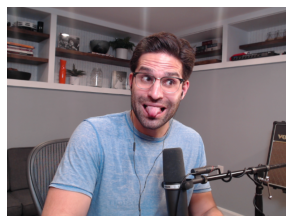

Smile! *FLASH*


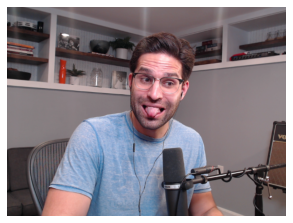

Smile! *FLASH*


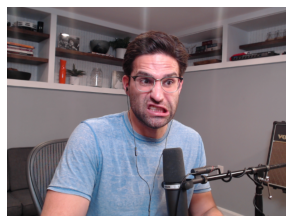

Smile! *FLASH*


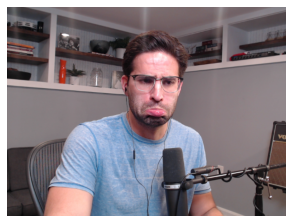

In [170]:
imgs = []
for x in range(5):
    time.sleep(3)
    for _ in range(10):
        res, img = cap.read()
    print("Smile! *FLASH*")
    res, img = cap.read()
    plot_cv2_img(img)
    imgs.append(img)

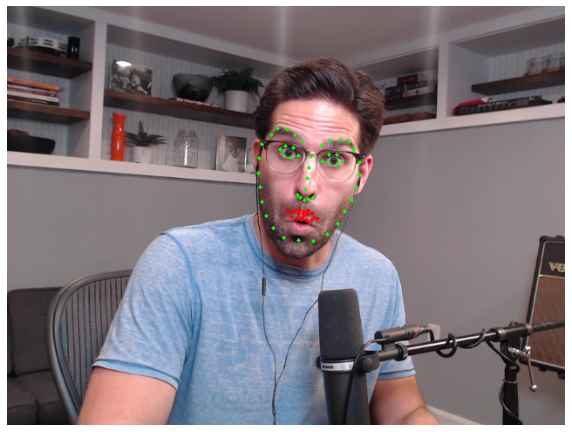

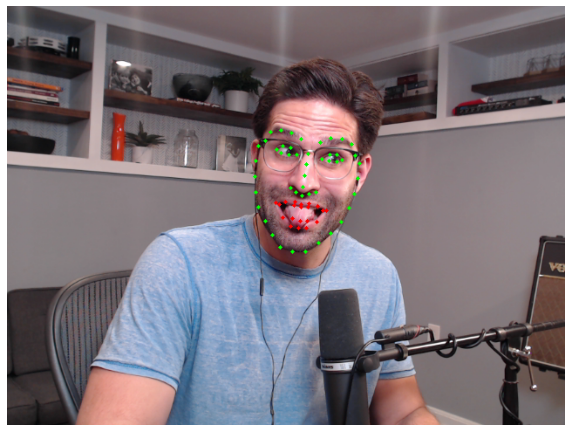

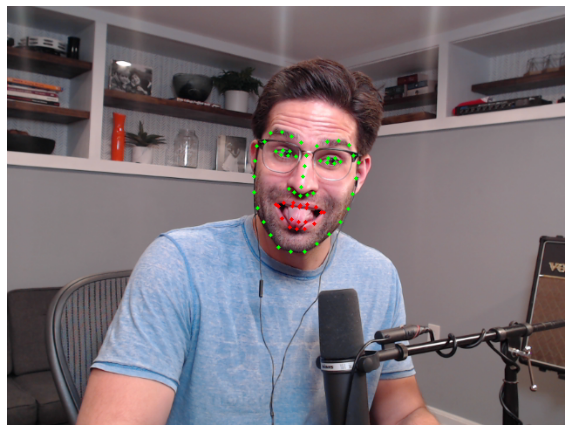

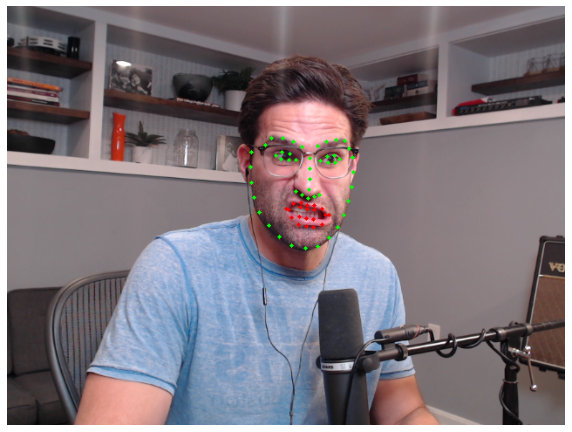

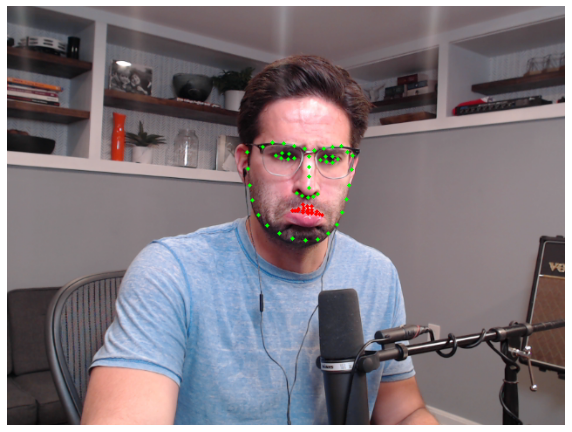

In [173]:
for img in imgs:
    image = img.copy()
    # Converting the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get faces into webcam's image
    rects = detector(gray, 0)

    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):

        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # Draw on our image, all the finded cordinate points (x,y)
        for keypoint, (x, y) in enumerate(shape):

            if keypoint >= 48:
                color = (0, 0, 255)
            else:
                color = (0, 255, 0)

            cv2.circle(image, (x, y), 2, color, -1)
    plot_cv2_img(image, figsize=(10, 10))

# MediaPipe

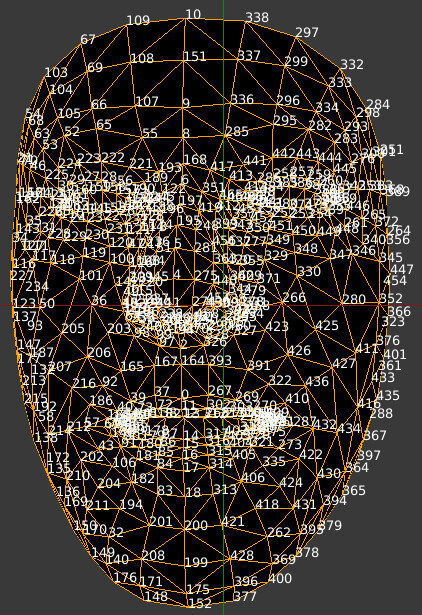!

In [186]:
len(results.multi_face_landmarks)

1

In [4]:
import cv2
import mediapipe as mp

cap = cv2.VideoCapture(7)
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
# cap = cv2.VideoCapture(7)
with mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        # Draw the face mesh annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style(),
                )
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style(),
                )
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_IRISES,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style(),
                )
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow("MediaPipe Face Mesh", cv2.flip(image, 1))
        break
        if cv2.waitKey(5) & 0xFF == 27:
            break
# cap.release()

# Single Image

In [2]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# For static images:
IMAGE_FILES = ['2022-11-27-235059.jpg']
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      # print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('annotated_image' + str(idx) + '.png', annotated_image)